
# Project: Investigate a Dataset (TMDb movie data)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

In this project ,i chose TMDb movie dataset . This dataset collects alot of movies with some information about each movie like (budjet ,revenue, cast , etc...)

Questions :

Q1: which year had the most movies's revenue?

Q2: Which genres are most popular from year to year؟




In [20]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> **Steps of cleaning Data:**

>*Drop unneccessary columns and just keep the columns we need.

>*Some values of some variables such (Budjet ,revenue) has not been recorded.So we drop these rows.

>*Drope dublicate rows .

>*Convert ('release_date') column  into date format.

### General Properties

In [21]:
# Read csv file 
df=pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [23]:
#returns the row and column count of a dataset
df.shape

(10866, 21)

In [24]:
# delete unnecessary columns
df.drop (['id', 'imdb_id', 'popularity', 'budget_adj', 'revenue_adj', 'homepage', 'keywords', 'overview', 'production_companies', 'vote_count', 'vote_average'],axis=1,inplace=True)
df.head()

,budget,revenue,original_title,cast,director,tagline,runtime,genres,release_date,release_year
0,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,6/9/15,2015
1,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,5/13/15,2015
2,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,119,Adventure|Science Fiction|Thriller,3/18/15,2015
3,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,2015
4,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,137,Action|Crime|Thriller,4/1/15,2015


In [25]:
# drop dublicates rows
df.drop_duplicates(keep = 'first', inplace = True)
df.shape

(10865, 10)

In [26]:
# drop some rows in 'budget', 'revenue' columns that not recorded
nonrec_row = ['budget', 'revenue']

# replace the value of '0' to NaN then drop these rows
df[nonrec_row] = df[nonrec_row].replace(0, np.NaN)

df.dropna(subset = nonrec_row, inplace = True)

df.shape

(3854, 10)

In [27]:
#convert the release_date column to date format ( i didn't need to this)
df.release_date = pd.to_datetime(df['release_date'])

#showing the dataset
df.head(1)

,budget,revenue,original_title,cast,director,tagline,runtime,genres,release_date,release_year
0,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,2015


<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1:  Which year has the highest revenue?

In [28]:
# sum revenue for each year by using groupby
revn = df.groupby('release_year')['revenue'].sum()
#Year has the higherst revenue
revn.idxmax()



2015

Lets visualize this .

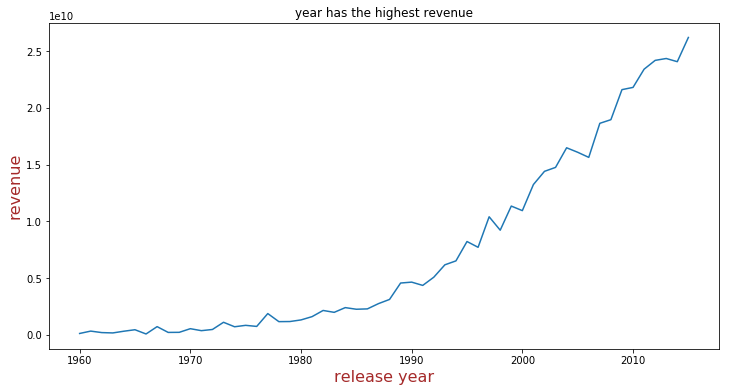

In [29]:
plt.figure(figsize=(12,6))

#chart title 
plt.title( 'year has the highest revenue')

#Axis titles
plt.xlabel('release year', color = 'Brown', fontsize = '16')
plt.ylabel('revenue', color = 'Brown', fontsize = '16')

plt.plot(revn)

plt.show()


From this chart we can see the year 2015 having the highest revenue than the other years.Revenue increased significantly from  year 1960 until 2015, so 2015 had the highest revenue of more than 25 billions dolars .

### Research Question 2 : What movie has the highest revenue?and who is its director?

In [31]:
# highest Function 
def highest (column_name): 
    highest_id = df[column_name].idxmax()
# details of that movie  
    highest_details = pd.DataFrame(df.loc[highest_id])

    return highest_details
# calling the function 
highest ('revenue')

    
   

,1386
budget,2.37e+08
revenue,2.78151e+09
original_title,Avatar
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...
director,James Cameron
tagline,Enter the World of Pandora.
runtime,162
genres,Action|Adventure|Fantasy|Science Fiction
release_date,2009-12-10 00:00:00
release_year,2009


#### As we see in this details,Avatar movie has the highest revenue and is directed by James Cameron.

### Research Question 3:Which genres are most popular from year to year?

In [34]:
# you can use this function to answer many questions ,this function can take any column as an argument

def most_fun(column_name):
    #separate the string by '|'
    top_genre = df[column_name].str.cat(sep = '|')
    top_genre= pd.Series(top_genre.split('|'))
#descending order
    genre_count = top_genre.value_counts(ascending = False)
    return genre_count
most_fun('genres')  

Drama              1756
Comedy             1358
Thriller           1204
Action             1085
Adventure           749
Romance             667
Crime               651
Science Fiction     519
Horror              463
Family              425
Fantasy             396
Mystery             344
Animation           201
Music               136
History             129
War                 119
Western              52
Documentary          35
Foreign              13
TV Movie              1
dtype: int64

#### lets visulize this

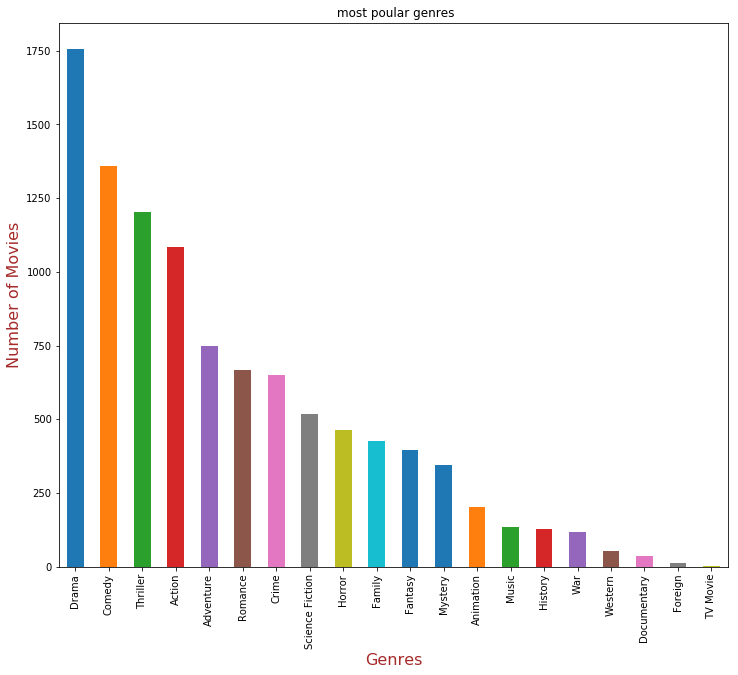

In [13]:
genre_count.sort_values(ascending = False, inplace = True) 

genre_a = genre_count.plot(kind='bar')

# title of chart
genre_a.set(title = ' most poular genres')

#Axis titles
genre_a.set_xlabel('Genres', color = 'Brown', fontsize = '16')
genre_a.set_ylabel('Number of Movies', color = 'Brown', fontsize = '16')

genre_a.figure.set_size_inches(12, 10)




#### From this chart , Drama is the most popular genre ,about 1750 movies have genres Drama . ِAlso Comedy ,Thriller and action have big popular .These four genres have more number of movies than rest of the genres as shown by Chart. as we seen from dataset one movie can considered more genre.

<a id='conclusions'></a>
## Conclusions

> From answering these questions we can Know alot of things :

As we see 2015 has the most revenue than the other years and the last decade had a significant rise in revenue compared to any other decades . Also we can Know the most popular genres as we see (Drama,Comedy,Thriller and Action ) are most popular genres.
From answering the question about  movie has the highest revenue we can Know the name of this movie (Avatar) and its directory  ,Cast and genres So you can know what is the audiance prefer .

there are no limitations in this project.

In [1]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0